# Clustering Project
In this project, we have a number of data from customers along with their income and Scores, and we want to divide these people into clusters using clustering algorithms.

### Clustering With K-Means

In [3]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelEncoder, StandardScaler

### read and show information of data set

In [4]:
# read dataset

df_customer = pd.read_csv('customer.csv')
df_customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# shape and name of the columns

print(df_customer.shape)
print(df_customer.columns)

(200, 5)
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [8]:
# Display the information and then we realize that the column is related to the Gender of the object and should be changed in the preprocessing

df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
# describe

df_customer.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### preprocessing

In [15]:
# checking for null value

df_customer.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
# change gender value to int

change_gender = LabelEncoder()
df_customer['Gender'] = change_gender.fit_transform(df_customer['Gender'])
df_customer['Gender'] = df_customer['Gender'].astype(int)
print(df_customer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB
None


In [19]:
# To continue this project, we do not need the customer ID and we select the rest of the columns as required features.

X = df_customer.values[:,1:]
X[:5]

array([[ 1, 19, 15, 39],
       [ 1, 21, 15, 81],
       [ 0, 20, 16,  6],
       [ 0, 23, 16, 77],
       [ 0, 31, 17, 40]])

In [24]:
# dataset normalization

standard_df_customer = StandardScaler()
standard_df_customer.fit_transform(X)
standard_df_customer


StandardScaler()

# K-Means

In [25]:
cluster_num = 4
k_means = KMeans(init='k-means++', n_clusters=cluster_num, n_init=12)
k_means.fit(X)
labels = k_means.labels_
labels

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [27]:
# add the labels to the main dataset

df_customer['clust_km'] = labels
df_customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust_km
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,1
3,4,0,23,16,77,0
4,5,0,31,17,40,1


In [28]:
# groupby with clust_km and calculate mean value

df_customer.groupby('clust_km').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
clust_km,,,,,
0,28.642857,0.500000,24.821429,28.714286,74.250000
1,71.831579,0.378947,44.894737,48.705263,42.631579
2,162.000000,0.461538,32.692308,86.538462,82.128205
3,162.000000,0.526316,40.394737,87.000000,18.631579


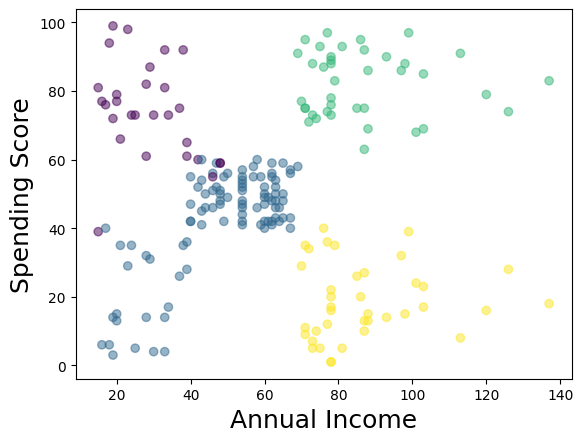

In [30]:
# plot with income and score

plt.scatter(X[:,2], X[:,3], c=labels.astype(np.float64), alpha=0.5)
plt.xlabel("Annual Income" , fontsize=18)
plt.ylabel("Spending Score" , fontsize=18)
plt.show()